In [1]:
using Plots, JLD2, LaTeXStrings, Plots.PlotMeasures, LinearAlgebra, Statistics

gr()

Plots.GRBackend()

In [2]:
data_id = "0809_0958"

source_id = "0505_1536"
file_source = jldopen("trained-weights/results-$data_id-$source_id.jld2")

JLDFile /home/n.klimkin/trained-weights/results-0809_0958-0505_1536.jld2 (read-only)
 ├─🔢 logamp
 ├─🔢 data_tst
 ├─🔢 pars_true
 ├─🔢 pars_infd
 ├─🔢 pulse_true
 ├─🔢 pulse_infd
 ├─🔢 M1
 ├─🔢 M2
 ├─🔢 cep_model
 └─🔢 par_model

Plotting figure 1: source problem crystal band parameters

In [3]:
N_plots = size(file_source["pars_true"], 1)

@assert N_plots%2 == 0

In [4]:
pars_true = file_source["pars_true"]
pars_infd = file_source["pars_infd"];

In [5]:
par_names = vcat(["Half band gap"], [L"t_%$i" for i=1:N_plots-1])

4-element Vector{AbstractString}:
 "Half band gap"
 L"$t_1$"
 L"$t_2$"
 L"$t_3$"

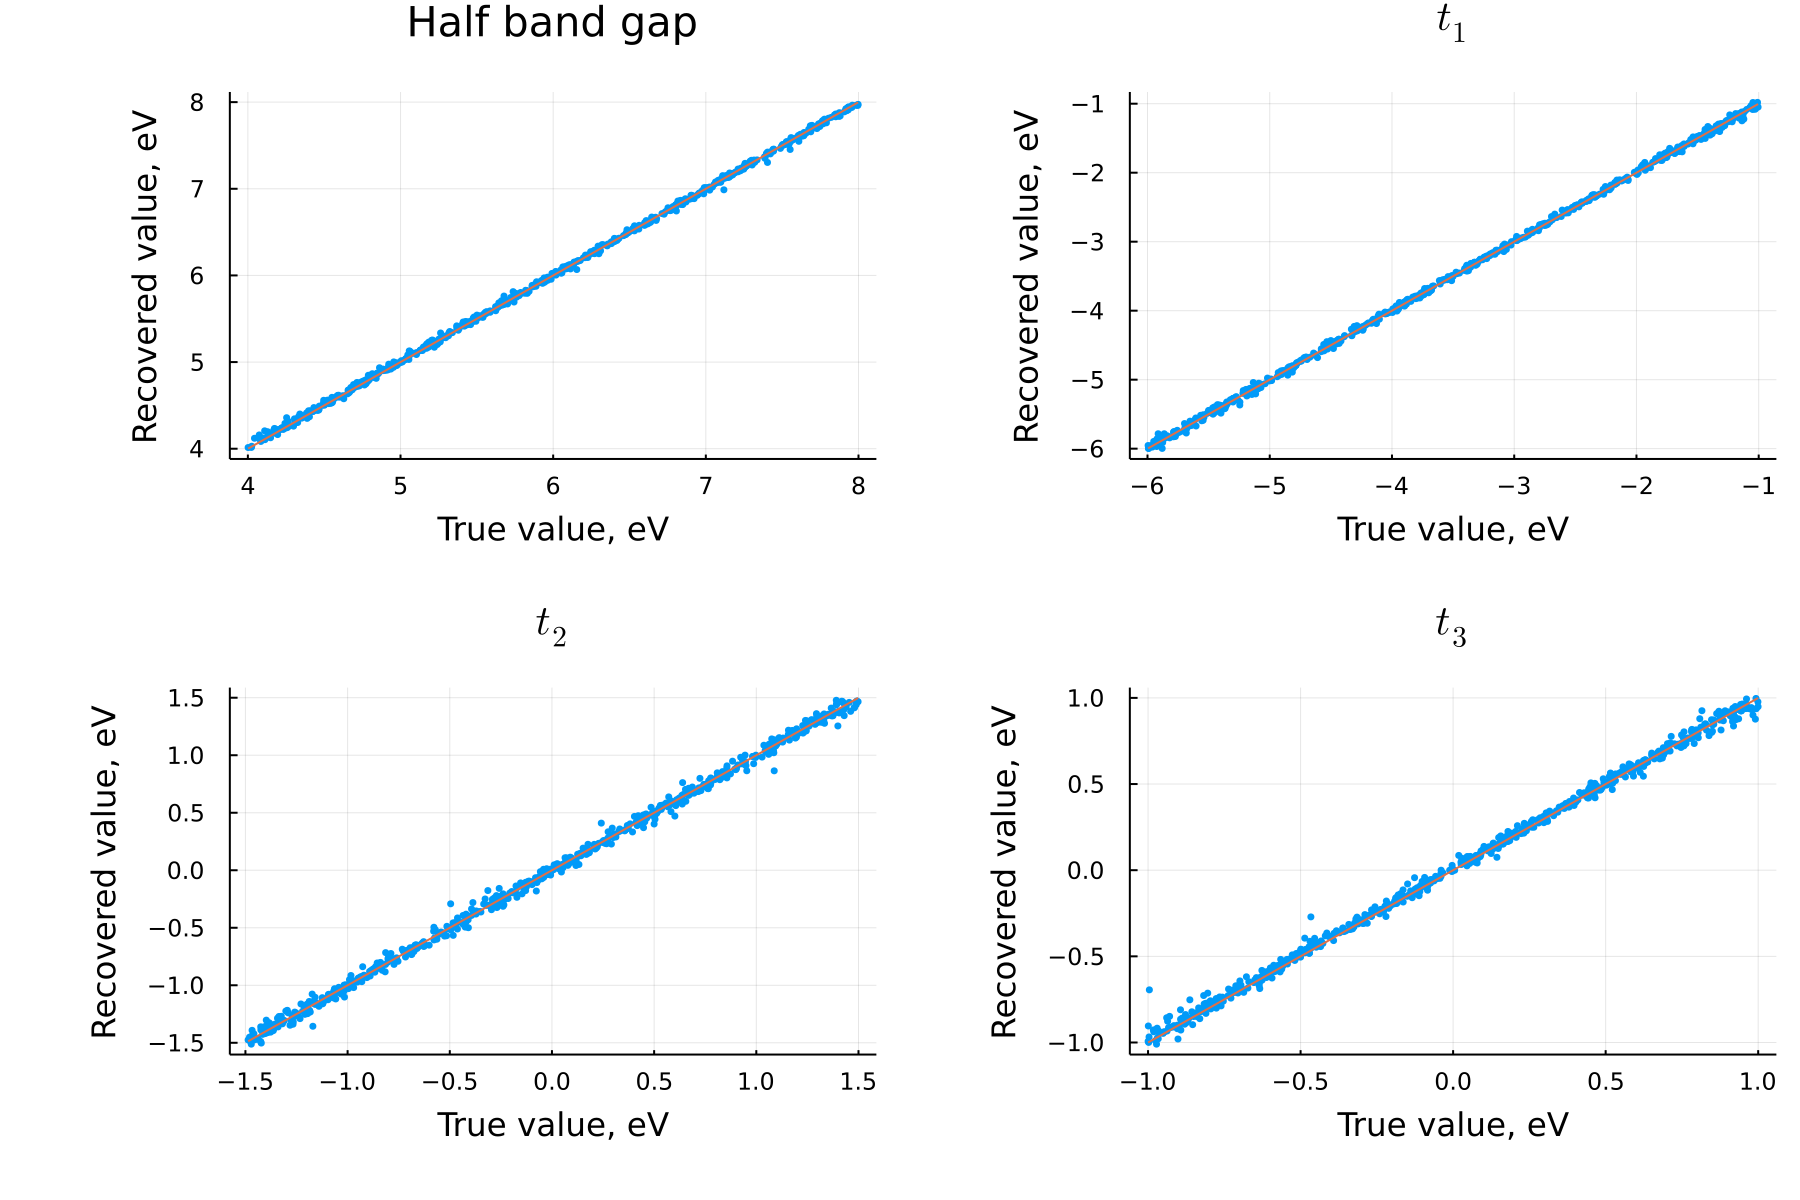

In [6]:
p = [begin
      tru = pars_true[i,:]
      infd = pars_infd[i,:]
      p = plot(tru, infd, seriestype=:scatter, markersize=2, markerstrokewidth=0, markerstrokealpha=0.0, thickness_scaling=2, title=par_names[i], xlabel="True value, eV", ylabel="Recovered value, eV", legend=false)
      ex = extrema(tru) |> collect
      plot!(p, ex, ex, linewidth=1)
end for i=1:N_plots]

p0 = plot(p..., layout=(N_plots÷2, 2), size=(1800, 600*N_plots÷2))

In [7]:
savefig(p0, "images/accuracy-$source_id.png")

In [8]:
println("Parameter errors:")
display(std(pars_true .- pars_infd, dims=2))
println("Relative parameter errors:")
display(std((pars_true .- pars_infd)./pars_true, dims=2))

4×1 Matrix{Float32}:
 0.023978291
 0.031160062
 0.038232952
 0.029072464

Parameter errors:


4×1 Matrix{Float32}:
 0.0044727
 0.013592568
 0.3437255
 0.5006202

Relative parameter errors:


Plotting figure 2: source problem CEP

In [9]:
N_pulse = size(file_source["pulse_true"], 1)

2

In [10]:
pulse_true = file_source["pulse_true"]
pulse_infd = vcat(mapslices(normalize, file_source["pulse_infd"][1:2,:], dims=1), file_source["pulse_infd"][3:end,:]);

In [11]:
titles=[L"\cos\varphi", L"\sin\varphi", L"\beta", L"\epsilon"]

4-element Vector{LaTeXString}:
 L"$\cos\varphi$"
 L"$\sin\varphi$"
 L"$\beta$"
 L"$\epsilon$"

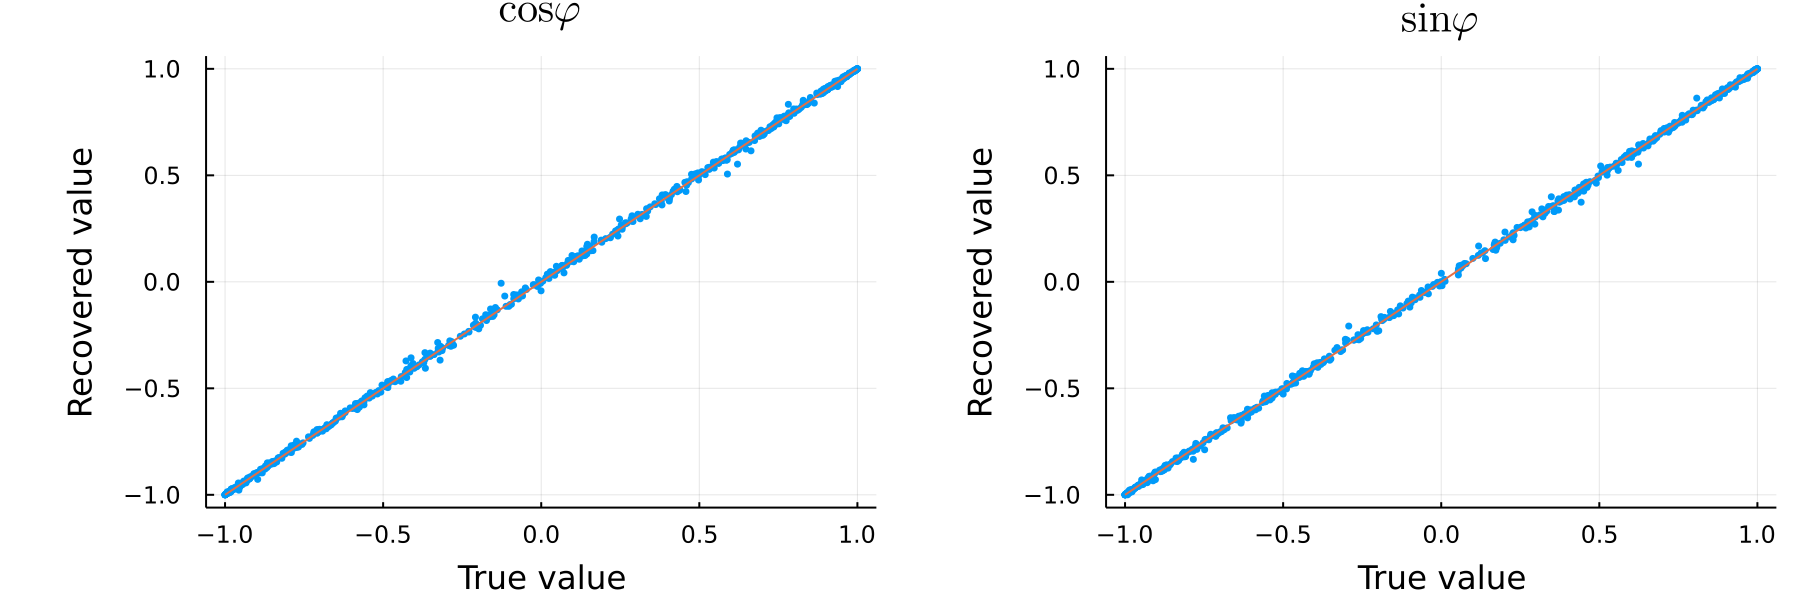

In [12]:
p = [begin
      if i <= N_pulse
            tru = pulse_true[i,:]
            infd = pulse_infd[i,:]
            p = plot(tru, infd, seriestype=:scatter, markersize=2, markerstrokewidth=0, 
                markerstrokealpha=0.0, thickness_scaling=2, title=titles[i], 
                xlabel="True value", ylabel="Recovered value", legend=false)
            ex = extrema(tru) |> collect
            plot!(p, ex, ex,linewidth=1)
      else
            p = plot(;seriestype=:scatter, markersize=1, markerstrokewidth=0, markerstrokealpha=0.0, thickness_scaling=2, title=titles[i], xlabel="True value", ylabel="Recovered value", left_margin=10mm, bottom_margin=10mm, legend=false,grid=false,foreground_color_subplot=:white)
      end
end for i=1:2*cld(N_pulse, 2)]
p0 = plot(p..., layout=(cld(N_pulse, 2), 2), size=(1800, 600*cld(N_pulse, 2)))

In [13]:
savefig(p0, "images/cep-$source_id.png")

In [14]:
println("CEP error:")
println(sqrt(2*(1.0 - mean(sum(pulse_true[1:2,:].*pulse_infd[1:2,:], dims=1)))))
if N_pulse > 2
    println("Pulse parameter errors:")
    println(std(pulse_true[3:end,:] .- pulse_infd[3:end,:], dims=2))
end

CEP error:
0.017557768160512893


In [15]:
target_id = "1206_1700"#"0605_1337"

file_target = jldopen("trained-weights/results-transfer-$data_id-$target_id.jld2")

JLDFile /home/n.klimkin/trained-weights/results-transfer-0809_0958-1206_1700.jld2 (read-only)
 ├─🔢 logamp
 ├─🔢 data_tst
 ├─🔢 cep_tst
 ├─🔢 M1
 ├─🔢 M2
 ├─🔢 M1t
 ├─🔢 M2t
 ├─🔢 cep_model
 ├─🔢 par_model
 └─ ⋯ (4 more entries)

Plotting figure 3: target problem crystal band parameters

In [16]:
pars_true = file_target["pars_true"]
pars_infd = file_target["pars_infd"];

In [26]:
par_ranges = extrema(pars_true, dims=2) |> vec#[(4.0, 8.0), (0.08, 0.16)]
units = ["eV", "a.u."]

2-element Vector{String}:
 "eV"
 "a.u."

In [18]:
N_plots = size(file_target["pars_true"], 1)

2

In [19]:
par_names = ["On-site energy", "First-neighbor hopping"]

2-element Vector{String}:
 "On-site energy"
 "First-neighbor hopping"

In [24]:
extrema(pars_true, dims=2)

2×1 Matrix{Tuple{Float64, Float64}}:
 (4.015899999710359, 7.237799999332428)
 (0.08008999999849534, 0.15977000094294547)

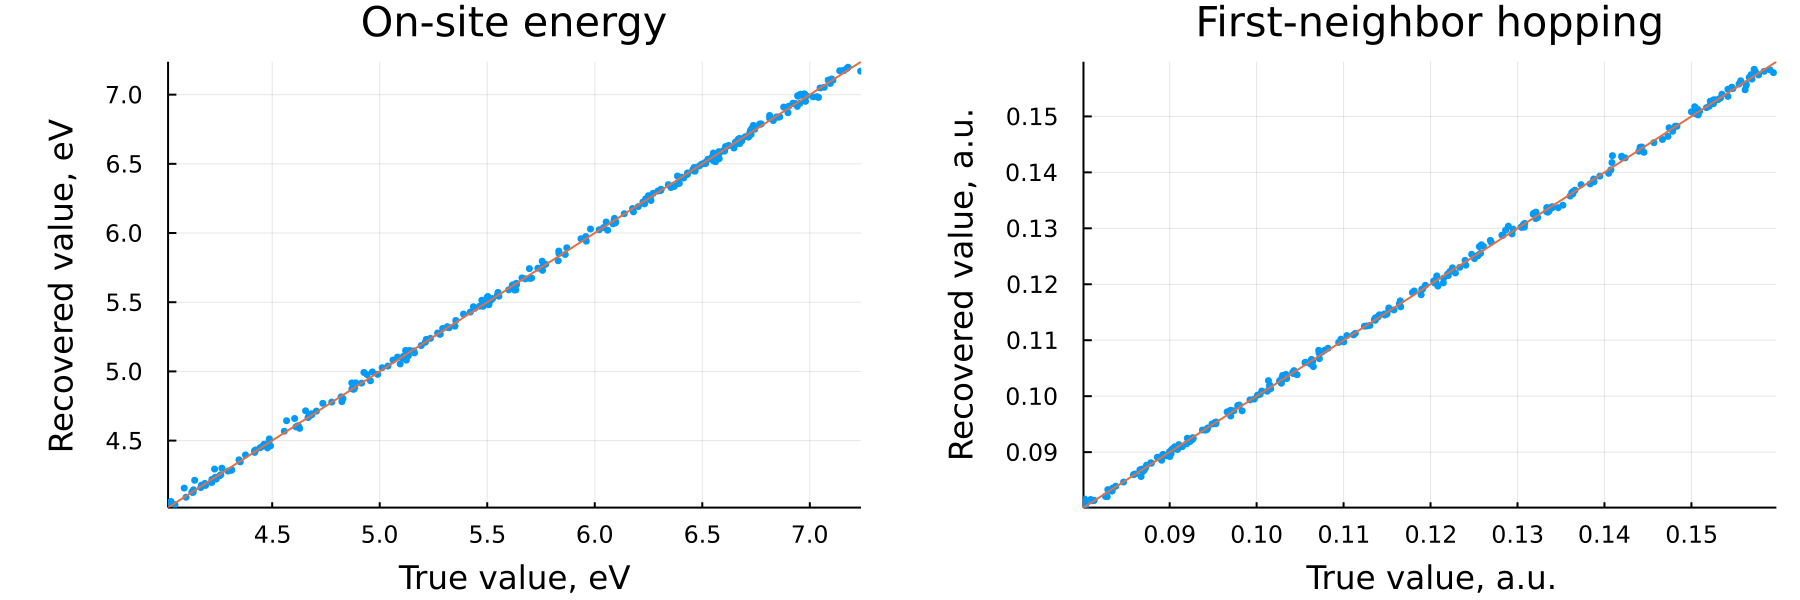

In [27]:
p = [begin
    tru = pars_true[i,:]
    infd = pars_infd[i,:]
    p = plot(tru, infd, seriestype=:scatter, markersize=2, markerstrokewidth=0, markerstrokealpha=0.0,
          thickness_scaling=2, title=par_names[i], xlabel="True value, $(units[i])", ylabel="Recovered value, $(units[i])",
          legend=false, xlims=par_ranges[i], ylims=par_ranges[i])
    #ex = extrema(tru) |> collect
    plot!(p, [par_ranges[i][1], par_ranges[i][2]], [par_ranges[i][1], par_ranges[i][2]], linewidth=1)
end for i=1:N_plots]

p0 = plot(p..., layout=(N_plots÷2, 2), size=(1800, 600*N_plots÷2))

In [28]:
savefig(p0, "images/accuracy-$target_id.png")

In [29]:
println("Parameter errors:")
println(std(pars_true .- pars_infd, dims=2))
println("Relative parameter errors:")
println(std((pars_true .- pars_infd)./pars_true, dims=2))

Parameter errors:
[0.023789007195059587; 0.0005440662393912456]
Relative parameter errors:
[0.004426078428568571; 0.004631302260744548]


Plotting figure 4: target problem CEP

In [30]:
pulse_true = file_target["pulse_true"]
pulse_infd = file_target["pulse_infd"]
pulse_infd = mapslices(normalize, pulse_infd, dims=1);

In [31]:
titles=[L"\cos\varphi", L"\sin\varphi"]

2-element Vector{LaTeXString}:
 L"$\cos\varphi$"
 L"$\sin\varphi$"

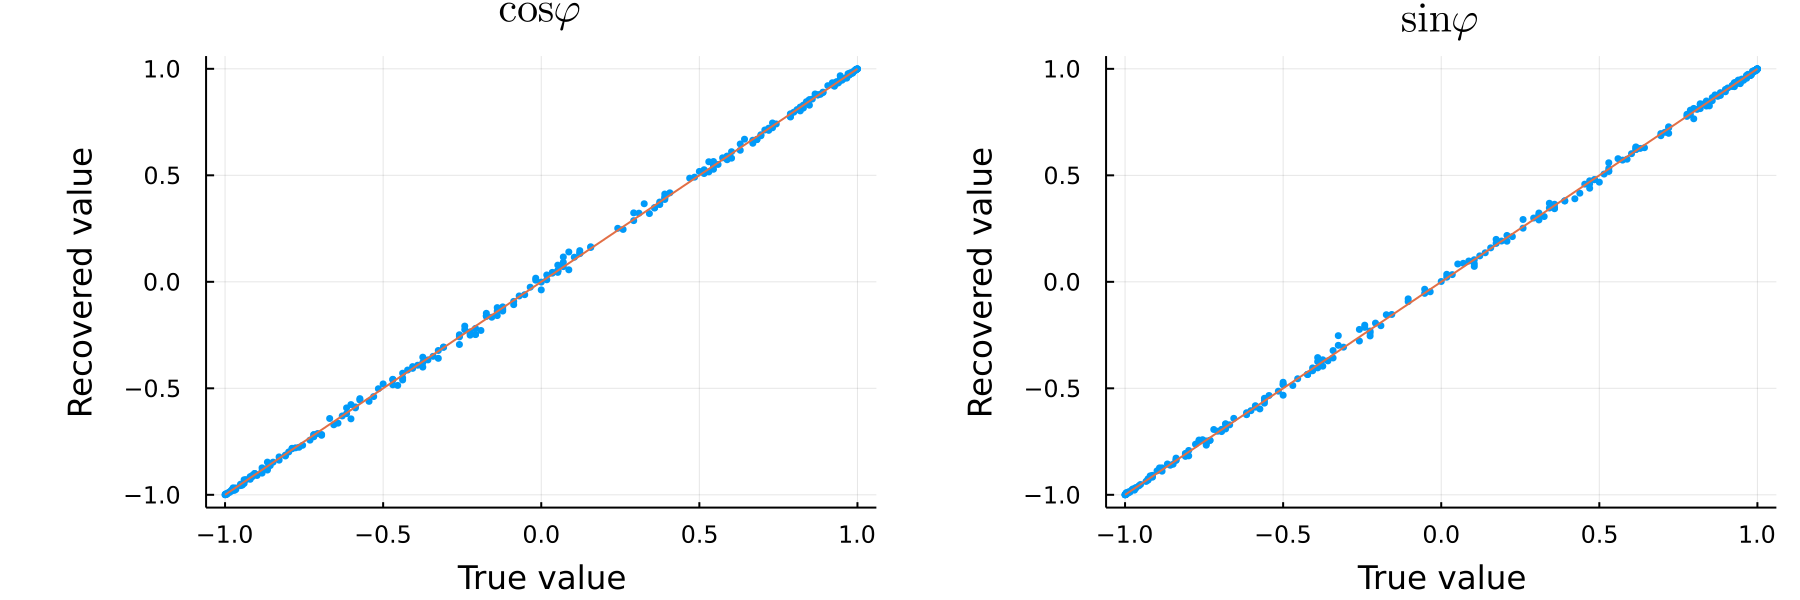

In [32]:
p = [begin
    tru = pulse_true[i,:]
    infd = pulse_infd[i,:]
    p = plot(tru, infd, seriestype=:scatter, markersize=2, markerstrokewidth=0, 
            markerstrokealpha=0.0, thickness_scaling=2, title=titles[i], 
            xlabel="True value", ylabel="Recovered value", legend=false)
    ex = extrema(tru) |> collect
    plot!(p, ex, ex,linewidth=1)
 end for i=1:2]
p0 = plot(p..., layout=(1, 2), size=(1800, 600))

In [33]:
savefig(p0, "images/cep-$target_id.png")

In [34]:
println("CEP error:")
println(sqrt(2*mean(1.0 .- sum(pulse_true.*pulse_infd, dims=1))))

CEP error:
0.019605174830654864
